In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D

In [2]:
(X_train, y_train), (X_test, y_test) = load_data()

In [3]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
# Standarization, changing data in fields from 0-255 to 0-1
X_train = X_train / 255.
X_test = X_test / 255.

In [5]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

(-0.5, 27.5, 27.5, -0.5)

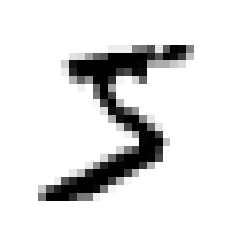

In [6]:
plt.imshow(X_train[0], cmap="gray_r")
plt.axis("off")

In [12]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(28,28, 1)))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=10, activation="softmax"))

In [13]:
model.compile(optimizer="adam",
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 flatten_4 (Flatten)         (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                      

In [15]:
history = model.fit(X_train, y_train, batch_size=128, epochs=8, validation_data=(X_test, y_test))

Epoch 1/8
469/469 [==============================] - 79s 168ms/step - loss: 0.1777 - accuracy: 0.9471 - val_loss: 0.0467 - val_accuracy: 0.9838
Epoch 2/8
469/469 [==============================] - 91s 194ms/step - loss: 0.0499 - accuracy: 0.9843 - val_loss: 0.0373 - val_accuracy: 0.9874
Epoch 3/8
469/469 [==============================] - 103s 219ms/step - loss: 0.0333 - accuracy: 0.9894 - val_loss: 0.0318 - val_accuracy: 0.9908
Epoch 4/8
469/469 [==============================] - 83s 177ms/step - loss: 0.0252 - accuracy: 0.9916 - val_loss: 0.0288 - val_accuracy: 0.9906
Epoch 5/8
469/469 [==============================] - 87s 186ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0344 - val_accuracy: 0.9898
Epoch 6/8
469/469 [==============================] - 81s 173ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0314 - val_accuracy: 0.9908
Epoch 7/8
469/469 [==============================] - 74s 158ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0273 - val_accuracy

In [16]:
metrics = pd.DataFrame(history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,0.177725,0.947117,0.046654,0.9838
1,0.049863,0.984300,0.037251,0.9874
2,0.033340,0.989350,0.031822,0.9908
3,0.025169,0.991567,0.028813,0.9906
4,0.019609,0.993767,0.034445,0.9898
5,0.014560,0.995083,0.031382,0.9908
6,0.013183,0.995733,0.027317,0.9909
7,0.011041,0.996517,0.033352,0.9908


In [17]:
model.evaluate(X_test, y_test, verbose=2)

313/313 - 4s - loss: 0.0334 - accuracy: 0.9908 - 4s/epoch - 12ms/step


[0.033352211117744446, 0.9908000230789185]